In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)
import proplot as pplot # there are some nice colormaps in the proplot package

In [2]:
fieldminMaxFile="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full1_1/postProcessing/minMaxComponents/fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data=data.drop(indexs_processor,axis=1)
data.rename(columns=lambda x:header[x],inplace=True)
data.head()

,Time,field,min,location(min),max,location(max)
0,0.080012,T,773.0,(0.000000e+00 1.927500e-04 2.500000e-07),933.3036,(3.625000e-05 5.512500e-04 2.500000e-07)
1,0.080026,T,773.0,(0.000000e+00 1.927500e-04 2.500000e-07),933.2757,(3.625000e-05 5.512500e-04 2.500000e-07)
2,0.080044,T,773.0,(0.000000e+00 1.927500e-04 2.500000e-07),933.2396,(3.625000e-05 5.512500e-04 2.500000e-07)
3,0.080064,T,773.0,(0.000000e+00 1.927500e-04 2.500000e-07),933.2021,(3.625000e-05 5.512500e-04 2.500000e-07)
4,0.080089,T,773.0,(0.000000e+00 1.927500e-04 2.500000e-07),933.1514,(3.625000e-05 5.512500e-04 2.500000e-07)


In [18]:
fieldminMaxFile="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full1_2/postProcessing/fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data2=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data2=data2.drop(indexs_processor,axis=1)
data2.rename(columns=lambda x:header[x],inplace=True)
data2.head()

,Time,field,min,location(min),max,location(max)
0,1.200000e-09,T,772.4256,(2.500000e-07 2.500000e-07 2.500000e-07),773.0,(1.675000e-05 7.325000e-05 2.500000e-07)
1,2.640000e-09,T,772.1223,(2.500000e-07 2.500000e-07 2.500000e-07),773.0,(2.075000e-05 7.075000e-05 2.500000e-07)
2,4.367999e-09,T,771.9733,(2.500000e-07 2.500000e-07 2.500000e-07),773.0,(2.525000e-05 6.575000e-05 2.500000e-07)
3,6.441599e-09,T,771.9035,(2.500000e-07 2.500000e-07 2.500000e-07),773.0,(8.937500e-04 3.622500e-04 2.500000e-07)
4,8.929917e-09,T,771.8862,(2.500000e-07 2.500000e-07 2.500000e-07),773.0,(8.937500e-04 3.622500e-04 2.500000e-07)


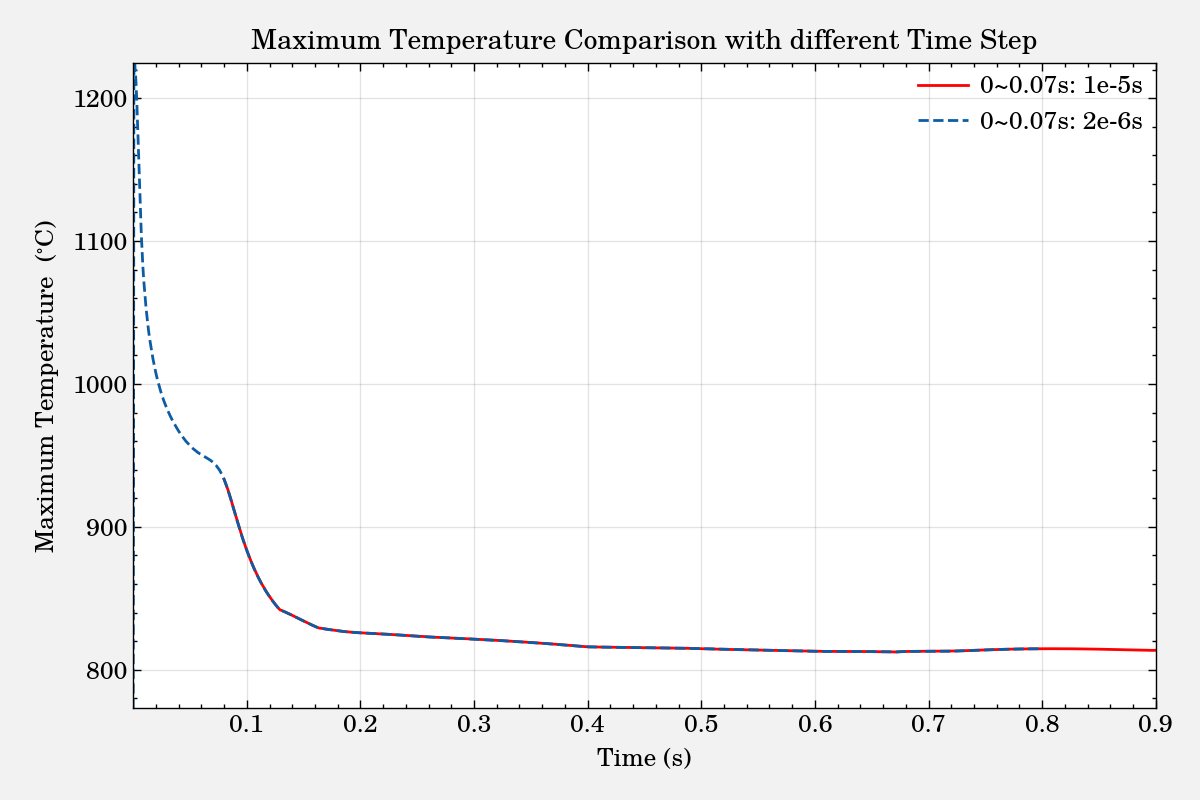

In [23]:
with plt.style.context(['science','no-latex', 'std-colors']):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(data["Time"],data["max"],linestyle="-",color="r",label="0~0.07s: 1e-5s")
    ax.plot(data2["Time"],data2["max"],linestyle="--",label="0~0.07s: 2e-6s")
    ax.set_xlabel(f"Time (s)")
    ax.set_ylabel("Maximum Temperature  ($^{\circ}$C)")
    ax.set_title("Maximum Temperature Comparison with different Time Step")
    ax.legend()
    ax.autoscale(tight=True)
    plt.tight_layout()